<a href="https://colab.research.google.com/github/DevP-ai/Machine-Learning/blob/master/Gradient_Descent_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/daily.csv')

In [ ]:
df.head(10)

,Instrument Type,Date,Segment,Commodity,Traded Contract(Lots),Total Value (Lacs),Avg Daily Turnover (Lacs)
0,FUTCOM,01-Dec-22,BULLION,GOLD,7267.0,389511.61,0.0
1,FUTCOM,02-Dec-22,BULLION,GOLD,5940.0,319602.11,0.0
2,FUTCOM,05-Dec-22,BULLION,GOLD,5922.0,319214.23,0.0
3,FUTCOM,06-Dec-22,BULLION,GOLD,5145.0,276754.85,0.0
4,FUTCOM,07-Dec-22,BULLION,GOLD,4597.0,247655.09,0.0
5,FUTCOM,08-Dec-22,BULLION,GOLD,3817.0,206462.12,0.0
6,FUTCOM,09-Dec-22,BULLION,GOLD,4699.0,255060.61,0.0
7,FUTCOM,12-Dec-22,BULLION,GOLD,4729.0,256319.16,0.0
8,FUTCOM,13-Dec-22,BULLION,GOLD,6533.0,356380.87,0.0
9,FUTCOM,14-Dec-22,BULLION,GOLD,4088.0,223799.03,0.0


In [ ]:
df.shape

(45, 7)

In [ ]:
df['Date']

0     01-Dec-22
1     02-Dec-22
2     05-Dec-22
3     06-Dec-22
4     07-Dec-22
5     08-Dec-22
6     09-Dec-22
7     12-Dec-22
8     13-Dec-22
9     14-Dec-22
10    15-Dec-22
11    16-Dec-22
12    19-Dec-22
13    20-Dec-22
14    21-Dec-22
15    22-Dec-22
16    23-Dec-22
17    26-Dec-22
18    27-Dec-22
19    28-Dec-22
20    29-Dec-22
21    30-Dec-22
22    01-Dec-22
23    02-Dec-22
24    05-Dec-22
25    06-Dec-22
26    07-Dec-22
27    08-Dec-22
28    09-Dec-22
29    12-Dec-22
30    13-Dec-22
31    14-Dec-22
32    15-Dec-22
33    16-Dec-22
34    19-Dec-22
35    20-Dec-22
36    21-Dec-22
37    22-Dec-22
38    23-Dec-22
39    26-Dec-22
40    27-Dec-22
41    28-Dec-22
42    29-Dec-22
43    30-Dec-22
44          NaN
Name: Date, dtype: object

In [ ]:
df['Total Value (Lacs)']

0     389511.61
1     319602.11
2     319214.23
3     276754.85
4     247655.09
5     206462.12
6     255060.61
7     256319.16
8     356380.87
9     223799.03
10    387822.13
11    291408.69
12    225349.90
13    460673.48
14    243945.71
15    331797.18
16    200312.09
17    123606.36
18    308774.36
19    245885.68
20    235351.35
21    268948.84
22    389511.61
23    319602.11
24    319214.23
25    276754.85
26    247655.09
27    206462.12
28    255060.61
29    256319.16
30    356380.87
31    223799.03
32    387822.13
33    291408.69
34    225349.90
35    460673.48
36    243945.71
37    331797.18
38    200312.09
39    123606.36
40    308774.36
41    245885.68
42    235351.35
43    268948.84
44          NaN
Name: Total Value (Lacs), dtype: float64

In [ ]:
df.isnull().sum()

Instrument Type              0
Date                         1
Segment                      1
Commodity                    1
Traded Contract(Lots)        1
Total Value (Lacs)           1
Avg Daily Turnover (Lacs)    1
dtype: int64

In [ ]:
df=df.dropna()

In [ ]:
df['Date']=df['Date'].apply(lambda x:float(x.split('-')[0]))

In [ ]:
df.head(5)

,Instrument Type,Date,Segment,Commodity,Traded Contract(Lots),Total Value (Lacs),Avg Daily Turnover (Lacs)
0,FUTCOM,1.0,BULLION,GOLD,7267.0,389511.61,0.0
1,FUTCOM,2.0,BULLION,GOLD,5940.0,319602.11,0.0
2,FUTCOM,5.0,BULLION,GOLD,5922.0,319214.23,0.0
3,FUTCOM,6.0,BULLION,GOLD,5145.0,276754.85,0.0
4,FUTCOM,7.0,BULLION,GOLD,4597.0,247655.09,0.0


In [ ]:
df.isnull().sum()

Instrument Type              0
Date                         0
Segment                      0
Commodity                    0
Traded Contract(Lots)        0
Total Value (Lacs)           0
Avg Daily Turnover (Lacs)    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 0 to 43
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Instrument Type            44 non-null     object 
 1   Date                       44 non-null     float64
 2   Segment                    44 non-null     object 
 3   Commodity                  44 non-null     object 
 4   Traded Contract(Lots)      44 non-null     float64
 5   Total Value (Lacs)         44 non-null     float64
 6   Avg Daily Turnover (Lacs)  44 non-null     float64
dtypes: float64(4), object(3)
memory usage: 2.8+ KB


In [ ]:
X=df["Date"]
y=df["Total Value (Lacs)"]

In [ ]:
#Mean squre error/cost function
def cost_function(y,y_prediction):
  cost=np.sum((y-y_prediction)**2)/len(y)
  print("Cost: ",cost)

In [ ]:
#Gradient Descent
import matplotlib.pyplot as plt

def gradient_desc(x,y,iterations,learning_rate = 0.0001,threshold=1e-6):   #1e-6==0.000001
  initial_slope=0.1
  initial_intercept=0.01
  learning_rate=learning_rate
  n=float(len(x))

  costs=[]
  slopes=[]
  previous_cost=None

  for i in range(iterations):
    #y=mx+c
    y_prediction=(initial_slope*x)+(initial_intercept)

    #cost
    current_cost=cost_function(y,y_prediction)

    if previous_cost and abs(previous_cost-current_cost)<=threshold:
      break

    previous_cost=current_cost 

    costs.append(current_cost)
    slopes.append(initial_slope)
     
    #Calculate m and b
    slope_der=(-2/n)*sum((y-y_prediction)*x)
    intercept_der=(-2/n)*sum(y-y_prediction)

    #Update m and b
    initial_slope=initial_slope-(learning_rate*slope_der)
    initial_intercept=initial_intercept-(learning_rate*intercept_der)
    
    print(f"Iteration {i+1}: Cost:{current_cost},Slope: {initial_slope},Intercept: {initial_intercept}")

  return initial_slope,initial_intercept

Cost:  84136370242.46329
Iteration 1: Cost:None,Slope: 865.0187261818185,Intercept: 56.14272663636363
Cost:  76877036926.77824
Iteration 2: Cost:None,Slope: 1671.6111902489351,Intercept: 109.48862390610743
Cost:  70562736142.98878
Iteration 3: Cost:None,Slope: 2423.8074509204826,Intercept: 160.23542345261828
Cost:  65070404846.26772
Iteration 4: Cost:None,Slope: 3125.2727573383395,Intercept: 208.55820745724657
Cost:  60293005383.25874
Iteration 5: Cost:None,Slope: 3779.425392086072,Intercept: 254.62026096720575
Cost:  56137438649.741554
Iteration 6: Cost:None,Slope: 4389.453311935182,Intercept: 298.5738667931361
Cost:  52522728998.97041
Iteration 7: Cost:None,Slope: 4958.329667328467,Intercept: 340.5610468460219
Cost:  49378445513.04517
Iteration 8: Cost:None,Slope: 5488.827276151824,Intercept: 380.7142535224077
Cost:  46643328857.886566
Iteration 9: Cost:None,Slope: 5983.532122255131,Intercept: 419.15701450368874
Cost:  44264096950.51535
Iteration 10: Cost:None,Slope: 6444.85594443516

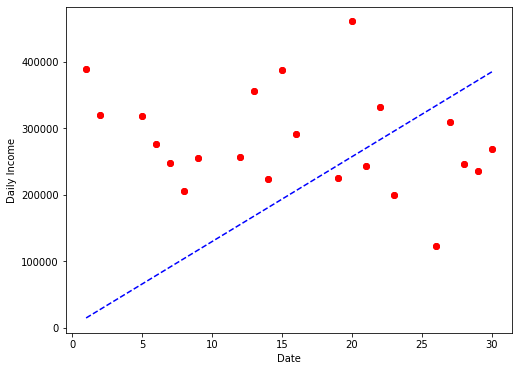

In [ ]:
estimated_slope, estimated_intercept=gradient_desc(X,y, iterations=100)
print('''



''')
print(f"\nEstimated Slope: {estimated_slope}\nEstimated Bias: {estimated_intercept}")


# Making predictions using estimated parameters
Y_pred = estimated_slope*X + estimated_intercept
 
    # Plotting the regression line
plt.figure(figsize = (8,6))
plt.scatter(X, y, marker='o', color='red')
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='blue',markerfacecolor='red',markersize=10,linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Daily Income")
plt.show()